In [49]:
import pymongo
import pprint# permet l’indentation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
connex= pymongo.MongoClient("mongodb://127.0.0.1:27017/")
db= connex.Crimalité
print(db.collection_names())

['Crimes', 'hardships', 'myresults', 'Area']


C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
#nombre de documents
print(db.Crimes.count())

4203000


C:\Users\adrien\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  


In [4]:
def affiche(curseur):
    #fonction qui affiche un curseur avec indentation"""
    pprint.pprint(list(curseur))

In [5]:
print(db.Crimes.distinct("Year"))

['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


In [7]:
pprint.pprint(db.Crimes.find_one())

{'Arrest': 'false',
 'Beat': '0924',
 'Block': '043XX S WOOD ST',
 'Case Number': 'HY411648',
 'Community Area': '61',
 'Date': '09/05/2015 01:30:00 PM',
 'Description': 'DOMESTIC BATTERY SIMPLE',
 'District': '009',
 'Domestic': 'true',
 'FBI Code': '08B',
 'ID': '10224738',
 'IUCR': '0486',
 'Latitude': '41.815117282',
 'Location': '(41.815117282, -87.669999562)',
 'Location Description': 'RESIDENCE',
 'Longitude': '-87.669999562',
 'Primary Type': 'BATTERY',
 'Updated On': '02/10/2018 03:50:01 PM',
 'Ward': '12',
 'X Coordinate': '1165074',
 'Y Coordinate': '1875917',
 'Year': '2015',
 '_id': ObjectId('613f46d7e9bb3e2248775784')}


In [ ]:
crimes = db.Crimes.find({ "Year":"2018"})
pprint.pprint(list(crimes))

## Nombre total de crimes par an

In [8]:
print(db.Crimes.find_one()) # Premier document d’une collection

{'_id': ObjectId('613f46d7e9bb3e2248775784'), 'ID': '10224738', 'Case Number': 'HY411648', 'Date': '09/05/2015 01:30:00 PM', 'Block': '043XX S WOOD ST', 'IUCR': '0486', 'Primary Type': 'BATTERY', 'Description': 'DOMESTIC BATTERY SIMPLE', 'Location Description': 'RESIDENCE', 'Arrest': 'false', 'Domestic': 'true', 'Beat': '0924', 'District': '009', 'Ward': '12', 'Community Area': '61', 'FBI Code': '08B', 'X Coordinate': '1165074', 'Y Coordinate': '1875917', 'Year': '2015', 'Updated On': '02/10/2018 03:50:01 PM', 'Latitude': '41.815117282', 'Longitude': '-87.669999562', 'Location': '(41.815117282, -87.669999562)'}


    Year  Nombre_crimes
0   2001         467294
1   2002         460039
2   2003         461858
3   2004         457955
4   2005         442091
5   2006         437395
6   2007         408390
7   2008          70188
8   2009            568
9   2010            641
10  2011            685
11  2012            908
12  2013           1062
13  2014           1944
14  2015         174860
15  2016         262746
16  2017         262094
17  2018         261462
18  2019         130218
19  2020          17602


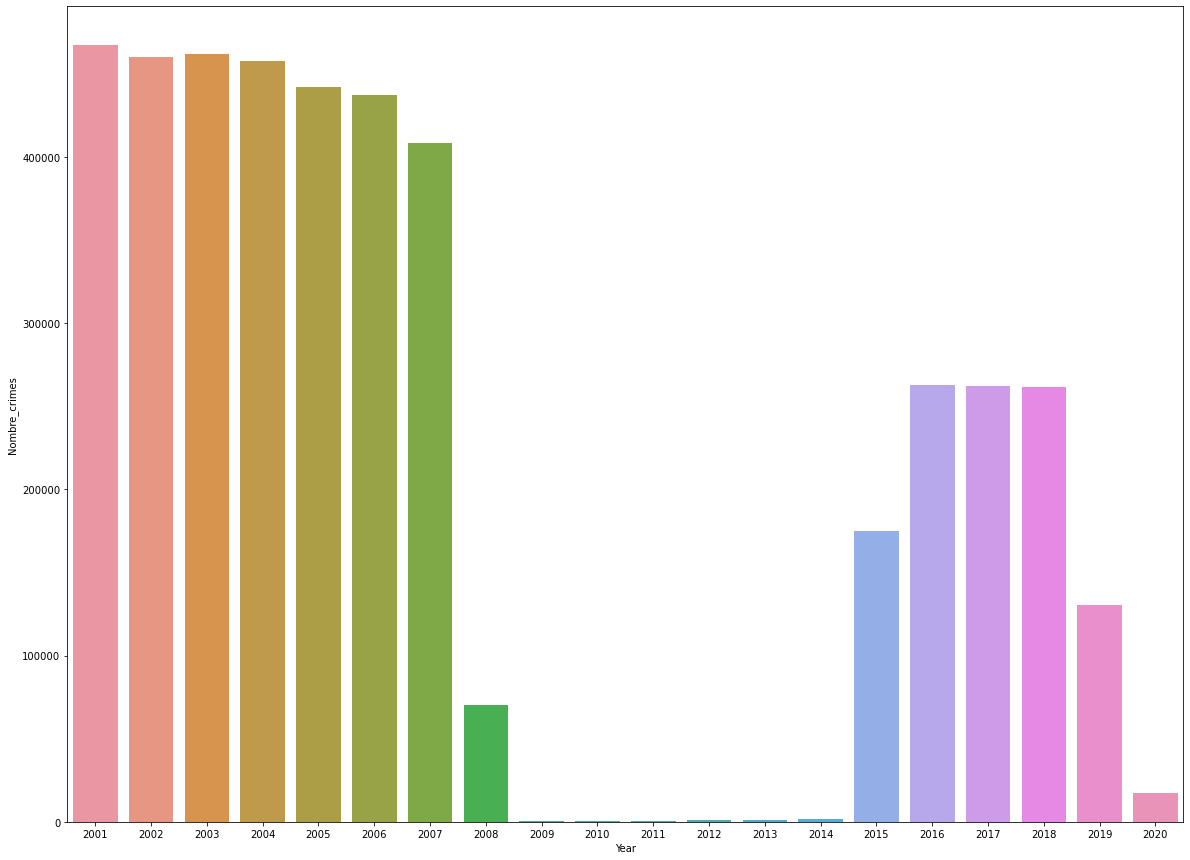

In [9]:
res= db.Crimes.aggregate([ 
    {"$group": {"_id": "$Year", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "_id": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Year", "Nombre_crimes":"Nombre_crimes"})
print(nb_crimes)

# Histogramme 
plt.subplots(figsize=(20,15))
s = sns.barplot(x="Year", y= "Nombre_crimes",data=nb_crimes)

## Nombre total d'arrestations par an

    Year  Nombre_arrestations
0   2001               137715
1   2002               134288
2   2003               138558
3   2004               142326
4   2005               138508
5   2006               132914
6   2007               124749
7   2008                20282
8   2009                  241
9   2010                  218
10  2011                  200
11  2012                  239
12  2013                  227
13  2014                  401
14  2015                43236
15  2016                52059
16  2017                51749
17  2018                52395
18  2019                28297
19  2020                 2238


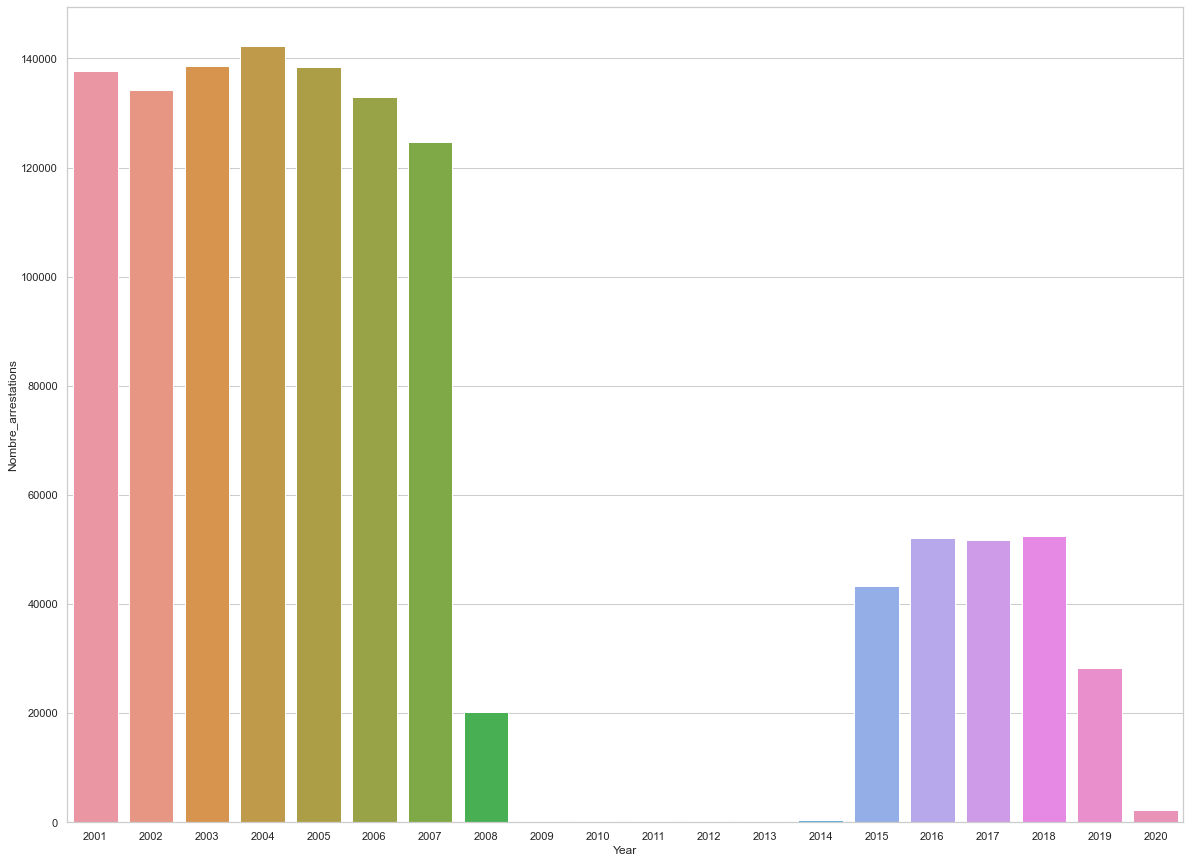

In [24]:
res= db.Crimes.aggregate([ 
    {"$match": {"Arrest": "true"}},
    {"$group": {"_id": "$Year", "Nombre_arrestations":{"$sum": 1}}},
    {"$sort" : { "_id": 1 } },
])

nb_arrestations = pd.DataFrame(list(res)).rename(columns = {"_id":"Year", "Nombre_arrestations":"Nombre_arrestations"})
print(nb_arrestations)

# Histogramme 
plt.subplots(figsize=(20,15))
s = sns.barplot(x="Year", y= "Nombre_arrestations",data=nb_arrestations)

## Nombre total de crimes par Local Description

    Location Description  Nombre_crimes
206                OTHER         165776
207             SIDEWALK         379650
208            APARTMENT         418610
209            RESIDENCE         745185
210               STREET        1164963


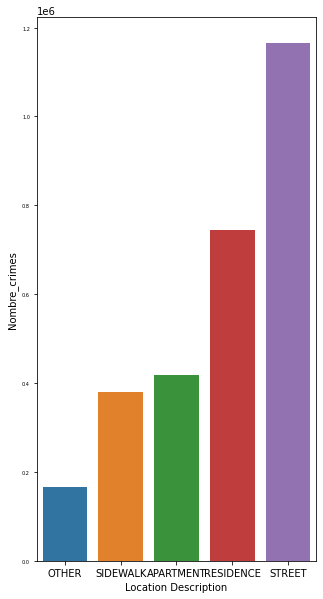

In [16]:
res= db.Crimes.aggregate([ 
    {"$group": {"_id": "$Location Description", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Location Description", "Nombre_crimes":"Nombre_crimes"})
nb_crimes = nb_crimes.tail(5)

print(nb_crimes)

# Histogramme 

# Histogramme 
plt.subplots(figsize=(5,10))
plt.yticks(fontsize=5)
s = sns.barplot(x="Location Description", y= "Nombre_crimes",data=nb_crimes)

## Nombre total de crimes par Block

                      Block  Nombre_crimes
58581  008XX N MICHIGAN AVE           4660
58582      0000X N STATE ST           4770
58583    076XX S CICERO AVE           5652
58584      001XX N STATE ST           8497
58585      100XX W OHARE ST          11874


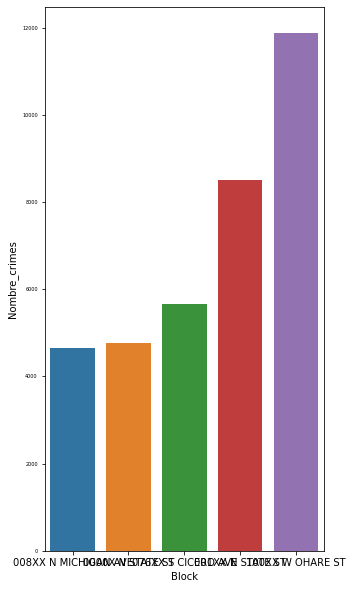

In [79]:
res= db.Crimes.aggregate([ 
    {"$group": {"_id": "$Block", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Block", "Nombre_crimes":"Nombre_crimes"})
nb_crimes = nb_crimes.tail(5) #5 blocks avec le plus de crimes

print(nb_crimes)

# Histogramme 

# Histogramme 
plt.subplots(figsize=(5,10))
plt.yticks(fontsize=5)
s = sns.barplot(x="Block", y= "Nombre_crimes",data=nb_crimes)

In [80]:
nb_crimes

,Block,Nombre_crimes
58581,008XX N MICHIGAN AVE,4660
58582,0000X N STATE ST,4770
58583,076XX S CICERO AVE,5652
58584,001XX N STATE ST,8497
58585,100XX W OHARE ST,11874


## Nombre total de crimes par “Primary Type”

                         Primary Type  Nombre_crimes
0                   DOMESTIC VIOLENCE              1
1    NON-CRIMINAL (SUBJECT SPECIFIED)              6
2                      NON - CRIMINAL             15
3                           RITUALISM             21
4                   HUMAN TRAFFICKING             49
5            OTHER NARCOTIC VIOLATION             71
6                    PUBLIC INDECENCY             93
7                        NON-CRIMINAL            135
8             CRIMINAL SEXUAL ASSAULT            270
9   CONCEALED CARRY LICENSE VIOLATION            380
10                          OBSCENITY            393
11                           STALKING           2173
12                       INTIMIDATION           2723
13                         KIDNAPPING           4754
14                              ARSON           7467
15                           HOMICIDE           8441
16                           GAMBLING           8574
17   INTERFERENCE WITH PUBLIC OFFICER         

[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Nombre_crimes')]

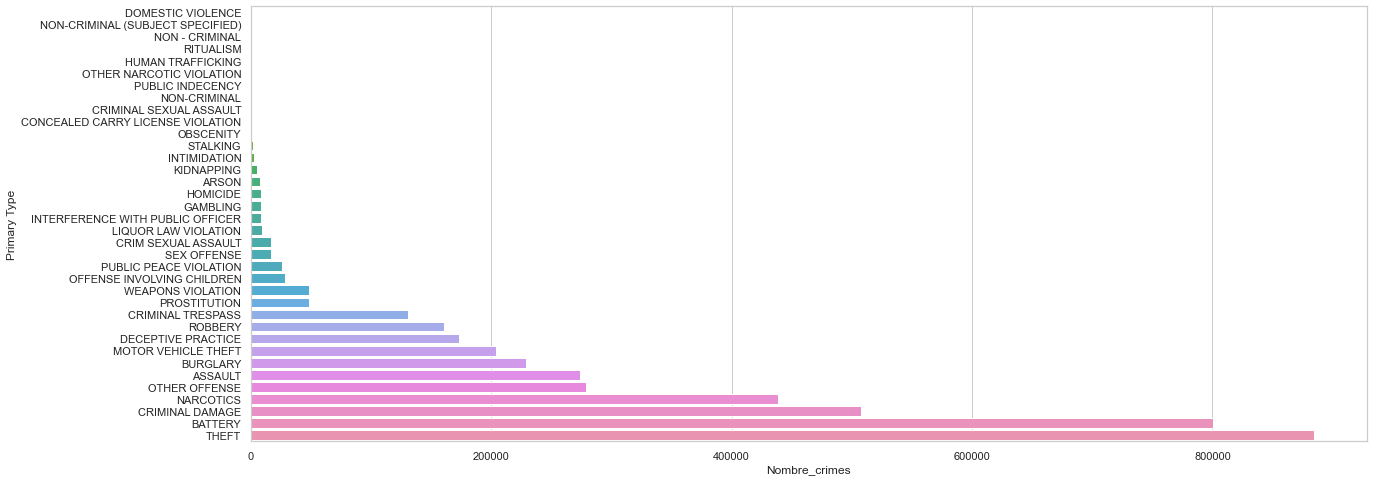

In [14]:
res= db.Crimes.aggregate([ 
    {"$group": {"_id": "$Primary Type", "Nombre_crimes":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Primary Type", "Nombre_crimes":"Nombre_crimes"})
print(nb_crimes)

plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='Nombre_crimes', y='Primary Type', data=nb_crimes)
type_graph.set(ylabel="Primary Type", xlabel="Nombre_crimes")

### Nombre total de vols par "Description"

                      Location Description  Nombre_crimes_THEFT
0                                   KENNEL                    1
1                     HIGHWAY / EXPRESSWAY                    1
2           COLLEGE / UNIVERSITY - GROUNDS                    1
3    OTHER RAILROAD PROPERTY / TRAIN DEPOT                    1
4                             HORSE STABLE                    1
..                                     ...                  ...
127                     SMALL RETAIL STORE                44897
128         PARKING LOT/GARAGE(NON.RESID.)                46542
129                                  OTHER                49883
130                              RESIDENCE                90465
131                                 STREET               240278

[132 rows x 2 columns]


[Text(0, 0.5, 'Nombre_crimes_THEFT'), Text(0.5, 0, 'Location Description')]

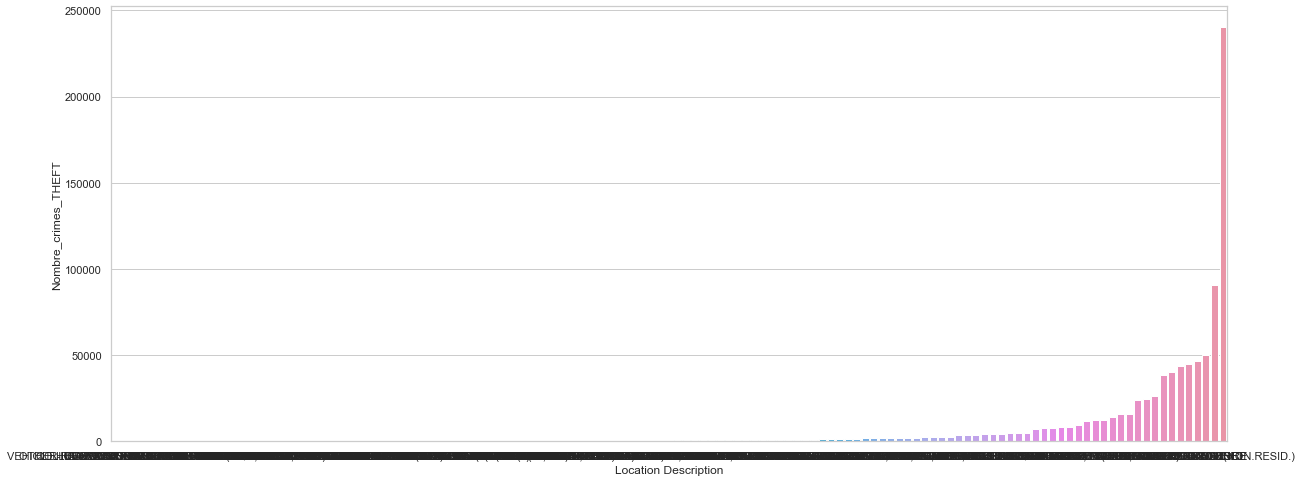

In [23]:
res= db.Crimes.aggregate([ 
    {"$match": {"Primary Type": "THEFT"}},
    {"$group": {"_id": "$Location Description", "Nombre_crimes_THEFT":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes_THEFT": 1 } },
])

nb_crimes_theft = pd.DataFrame(list(res)).rename(columns = {"_id":"Location Description", "Nombre_crimes_THEFT":"Nombre_crimes_THEFT"})
print(nb_crimes_theft)

plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='Location Description', y='Nombre_crimes_THEFT', data=nb_crimes_theft)
type_graph.set(ylabel="Nombre_crimes_THEFT", xlabel="Location Description")

In [ ]:
res= db.Crimes.aggregate([ 
    {"$match": {"Primary Type": "THEFT"}},
    {"$group": {"_id": "$Description", "Nombre_crimes_THEFT":{"$sum": 1}}},
    {"$sort" : { "Nombre_crimes_THEFT": 1 } },
])

nb_crimes_theft = pd.DataFrame(list(res)).rename(columns = {"_id":"Description", "Nombre_crimes_THEFT":"Nombre_crimes_THEFT"})
print(nb_crimes_theft)

plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='Description', y='Nombre_crimes_THEFT', data=nb_crimes_theft)
type_graph.set(ylabel="Nombre_crimes_THEFT", xlabel="Description")

### Ratio d'arrestation des crimes en fonction des types de crimes

In [ ]:
res= db.Crimes.aggregate([ 
    {"$group": {"_id": "$Primary Type", "ratio":{"$sum": 1}}},
    {"$sort" : { "_id": 1 } },
])

nb_crimes = pd.DataFrame(list(res)).rename(columns = {"_id":"Primary Type", "Nombre_crimes":"Nombre_crimes"})
print(nb_crimes)

# Histogramme 
plt.subplots(figsize=(20,15))
s = sns.barplot(x="Year", y= "Nombre_crimes",data=nb_crimes)

In [ ]:
# Occurrence rates of the various types of crime
crimetypegb=crimedata.groupby(["Primary Type"])["Primary.Type"].count()/len(crimedata)*100
crimetypegb.sort_values(ascending=False, inplace=True)
print(crimetypegb)

In [ ]:
crimetypegb.plot(kind='bar',title="Type of Crime")
plt.ylabel('Occurrence rate (%)')

In [ ]:
db.collectionName.aggregate({"$group":{"_id":null,"count":{"$sum":1},"data":{"$push":"$$ROOT"}}},
                            {"$unwind":"$data"},
                             {"$group":{"_id":{"type":"$data.type"},"count":{"$sum":1},
                                       "total":{"$first":"$count"}}},
                             {"$project":{"count":1,"percentage":{"$multiply":[{"$divide":[100,"$total"]},"$count"]}}}
                            ).pretty()

### Nombre total de crimes par Block - Map Reduce

In [68]:
map = "function () {""emit(this.Block, 1);""}"

In [69]:
reduce = "function (key, values) {""  var total = 0;""  for (var i = 0; i < values.length; i++) {""    total += values[i];" "  }""  return total;""}"

In [70]:
res= db.Crimes.map_reduce(map,reduce, "myresults")    

In [71]:
print(db.res.find())

In [76]:
for doc in res.find()[:10]:
    print (doc)

{'_id': '098XX S HARVARD AVE', 'value': 33.0}
{'_id': '084XX S LOOMIS ST', 'value': 5.0}
{'_id': '037XX N SAWYER AVE', 'value': 104.0}
{'_id': '040XX S KEDZIE AVE', 'value': 112.0}
{'_id': '001XX E 14TH ST', 'value': 34.0}
{'_id': '018XX W AUGUSTA BV', 'value': 18.0}
{'_id': '086XX S HONORE ST', 'value': 78.0}
{'_id': '032XX N Sheffield Ave', 'value': 2.0}
{'_id': '134XX S CORLISS AV', 'value': 4.0}
{'_id': '081XX S HALSTED ST', 'value': 393.0}
